In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv('data.csv', low_memory=False)

In [3]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        9346
Independent House/Villa      1865
Residential Land              769
Independent/Builder Floor     166
Farm House                     38
Studio Apartment               25
Other                          13
Serviced Apartments             6
Name: count, dtype: int64

In [4]:
df = df[df['PROPERTY_TYPE']=='Residential Land']

In [5]:
df.shape

(769, 170)

In [6]:
len(list(df.isnull().sum().loc[lambda x: x!=0].index))

80

In [7]:
df.drop(columns=list(df.isnull().sum().loc[lambda x: x==df.shape[0]].index), inplace=True)

In [8]:
df = df[['DESCRIPTION', 'CITY', 'LOCALITY', 'AREA', 'PRICE', 'PD_URL']]

In [9]:
df = df[df['PRICE'] != 'Price on Request'].copy()

In [10]:
df.sample(5)

,DESCRIPTION,CITY,LOCALITY,AREA,PRICE,PD_URL
6888,Plot in ratnaakar oasis\nBest for investment\n...,Ahmedabad West,Kolat,5733 sq.ft.,86 L,/residential-land-plot-for-sale-in-kolat-ahmed...
11211,"We have a land available for sale in dholera, ...",Ahmedabad South,Dholera,88740 sq.ft.,3.75 Cr,/residential-land-plot-for-sale-in-dholera-ahm...
2109,This one is swayam lifespace located bavla nal...,Ahmedabad South,Bavla,2385 sq.ft.,35 L,/residential-land-plot-for-sale-in-bavla-ahmed...
8389,"Spacious, ready to build plot in shela, ahmeda...",Ahmedabad West,Shela,10404 sq.ft.,9.51 Cr,/residential-land-plot-for-sale-in-shatikrupa-...
2499,"Located near ahmedabad, at bavla-Nalsarovar ro...",Ahmedabad South,Adroda,2421 sq.ft.,34 L,/residential-land-plot-for-sale-in-adroda-ahme...


In [11]:
df.shape

(752, 6)

In [12]:
df['AREA'] = df['AREA'].str.replace(' sq.ft.', '')

In [13]:
df['AREA'] = df['AREA'].astype(float)

In [14]:
def convert_price(price):
    if np.nan is price:
        return price
    elif 'Cr' in price:
        price = price.replace('Cr', '')
        return float(price) * 10000000
    elif 'L' in price:
        price = price.replace('L', '')
        return float(price) * 100000

df['PRICE'] = df['PRICE'].apply(convert_price)

In [15]:
df['PRICE'] = df['PRICE'].astype(float)

In [16]:
print(df[df['AREA']<3000].shape[0]+df[df['AREA']>15000].shape[0])
indices_to_drop = df[(df['AREA'] < 3000) | (df['AREA'] > 15000)].index
df.drop(indices_to_drop, inplace=True)
df.reset_index(drop=True, inplace=True)

print(df[df['PRICE']>100000000].shape[0])
indices_to_drop = df[(df['PRICE'] > 100000000)].index
df.drop(indices_to_drop, inplace=True)
df.reset_index(drop=True, inplace=True)

314
29


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DESCRIPTION  409 non-null    object 
 1   CITY         409 non-null    object 
 2   LOCALITY     409 non-null    object 
 3   AREA         409 non-null    float64
 4   PRICE        409 non-null    float64
 5   PD_URL       409 non-null    object 
dtypes: float64(2), object(4)
memory usage: 19.3+ KB


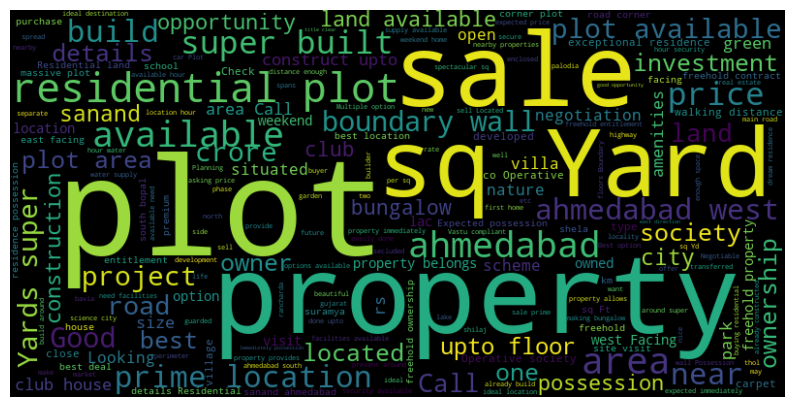

In [18]:
text = ' '.join(df['DESCRIPTION'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

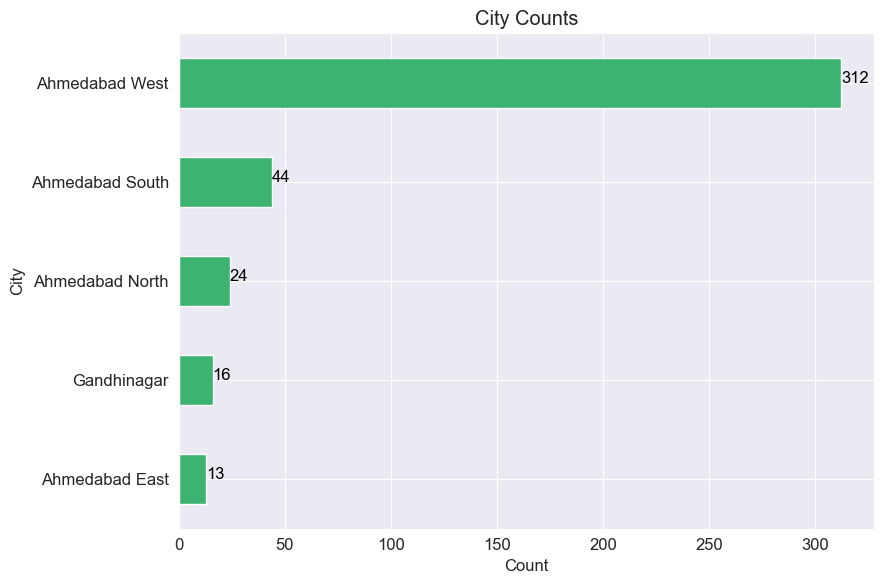

In [19]:
city_counts = df['CITY'].value_counts(ascending=True)

bars = city_counts.plot(kind='barh', color='mediumseagreen')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             fontsize=12, color='black')

plt.title('City Counts')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

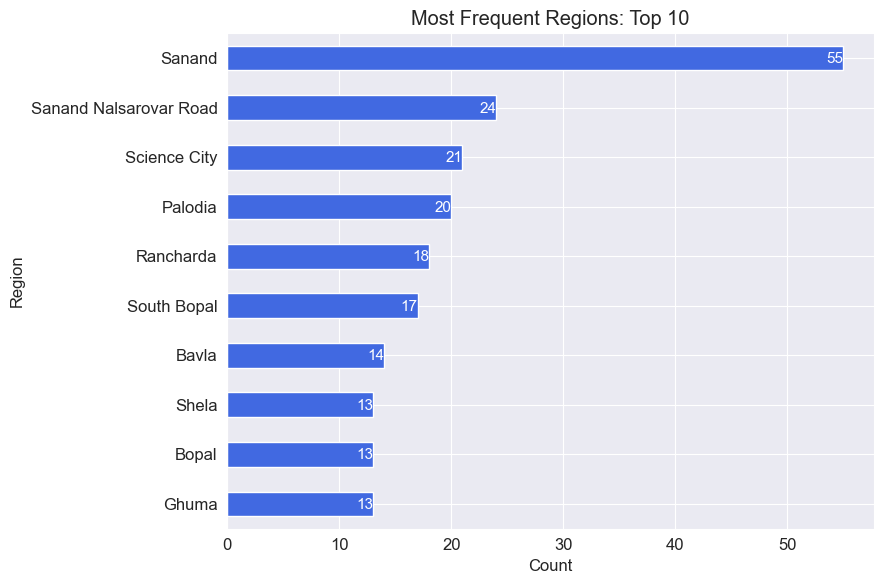

In [20]:
region_counts = df['LOCALITY'].value_counts(ascending=True)[-10:]

bars = region_counts.plot(kind='barh', color='royalblue')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2 - 0.1, f'{int(bar.get_width())}', 
             ha='right', fontsize=11, color='white')

plt.title('Most Frequent Regions: Top 10')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

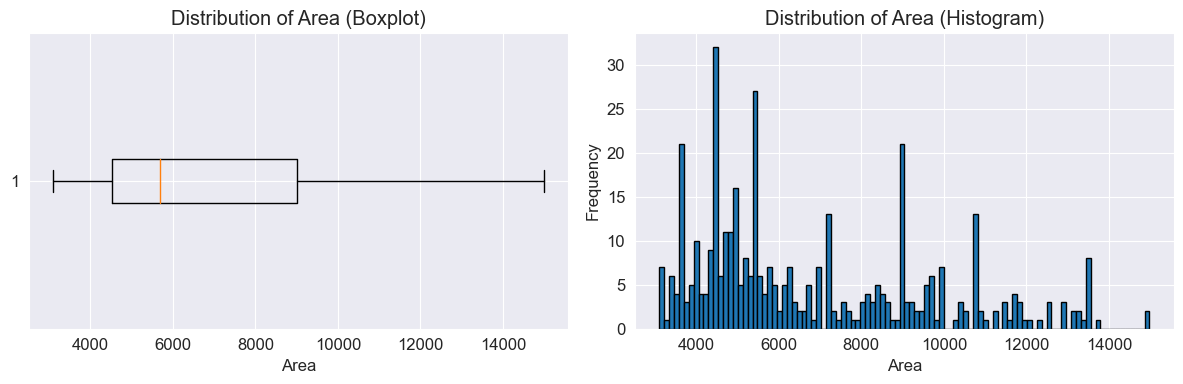

In [21]:
area_data = df['AREA']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(area_data, vert=False)
plt.title('Distribution of Area (Boxplot)')
plt.xlabel('Area')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.hist(area_data, bins=100, edgecolor='black')
plt.title('Distribution of Area (Histogram)')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

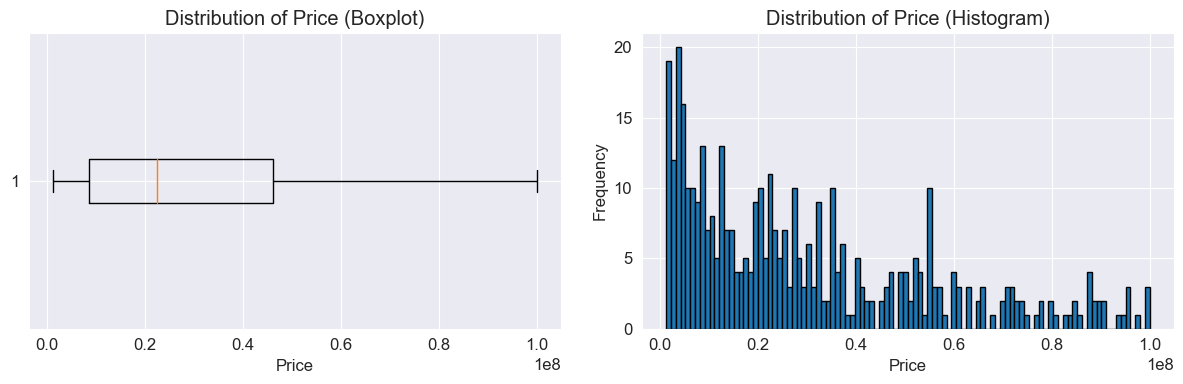

In [22]:
price_data = df['PRICE']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(price_data, vert=False)
plt.title('Distribution of Price (Boxplot)')
plt.xlabel('Price')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.hist(price_data, bins=100, edgecolor='black')
plt.title('Distribution of Price (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

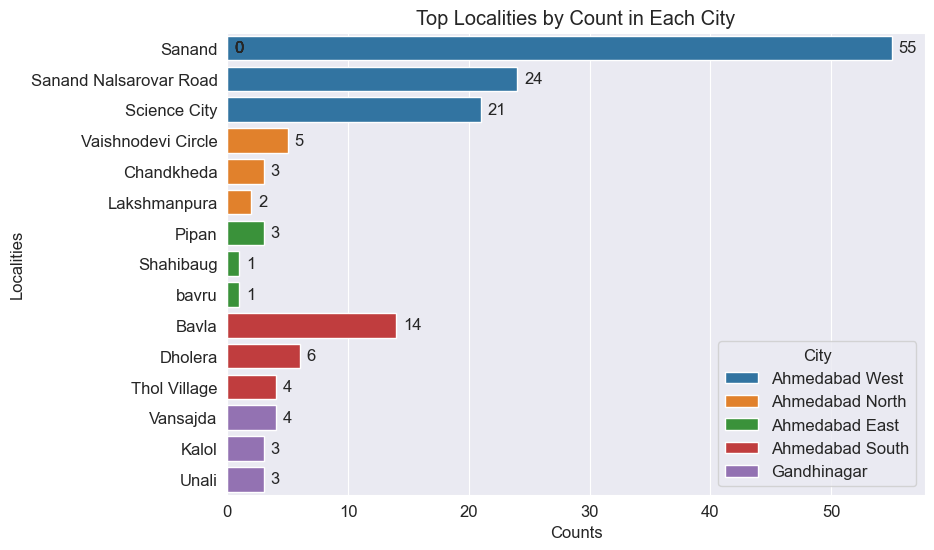

In [23]:
locality_counts = df.groupby('CITY')['LOCALITY'].value_counts()
locality_counts_df = locality_counts.reset_index(name='counts')
locality_counts_df = locality_counts_df.sort_values(['CITY', 'counts'], ascending=[True, False])
temp_df = locality_counts_df.groupby('CITY').head(3)
custom_order = {
    'Ahmedabad West': 1, 
    'Ahmedabad North': 2, 
    'Ahmedabad East': 3, 
    'Ahmedabad South': 4, 
    'Gandhinagar': 5
}
temp_df = temp_df.copy()
temp_df.loc[:,'Order'] = temp_df['CITY'].map(custom_order)

temp_df = temp_df.sort_values(by=['Order', 'counts'], ascending=[True, False])
temp_df.drop('Order', axis=1, inplace=True)
city_order = ['Ahmedabad West', 'Ahmedabad North', 'Ahmedabad East', 'Ahmedabad South', 'Gandhinagar']
temp_df.loc[:,'CITY'] = pd.Categorical(temp_df['CITY'], categories=city_order, ordered=True)

barplot = sns.barplot(data=temp_df, x='counts', y='LOCALITY', hue='CITY', dodge=False)

plt.title('Top Localities by Count in Each City')
plt.xlabel('Counts')
plt.ylabel('Localities')
plt.legend(title='City', loc='lower right')

for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha = 'left',  
                     va = 'center',  
                     xytext = (5, 0),  
                     textcoords = 'offset points')

plt.show()

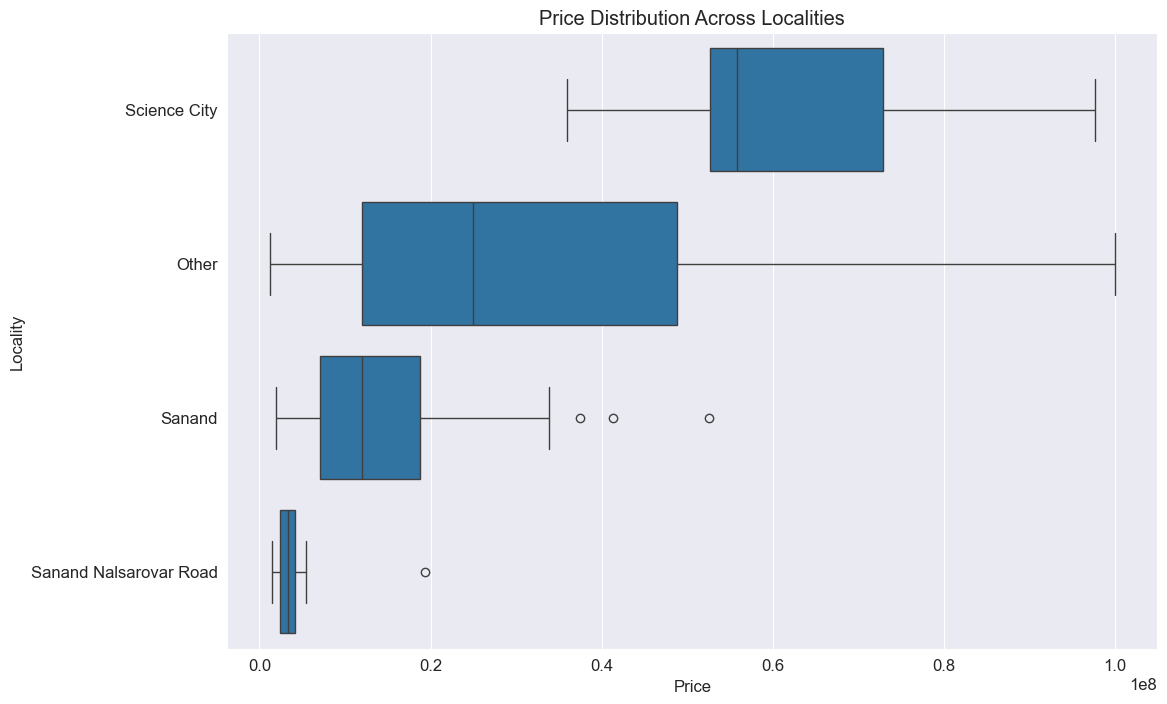

In [24]:
import warnings

temp_df = df[['LOCALITY', 'PRICE']].copy()
locality_counts = temp_df['LOCALITY'].value_counts()
threshold = 21
localities_to_replace = locality_counts[locality_counts < threshold].index
temp_df.loc[temp_df['LOCALITY'].isin(localities_to_replace), 'LOCALITY'] = 'Other'
warnings.filterwarnings("ignore", message="The default of observed")
median_prices = temp_df.groupby('LOCALITY', observed=False)['PRICE'].median().sort_values(ascending=False)

temp_df['LOCALITY'] = temp_df['LOCALITY'].astype("category")
temp_df['LOCALITY'] = temp_df['LOCALITY'].cat.set_categories(median_prices.index)

plt.figure(figsize=(12, 8))
sns.boxplot(data=temp_df, x='PRICE', y='LOCALITY', orient='h', order=median_prices.index)
plt.title('Price Distribution Across Localities')
plt.xlabel('Price')
plt.ylabel('Locality')
plt.show()

In [25]:
df.sample(5)

,DESCRIPTION,CITY,LOCALITY,AREA,PRICE,PD_URL
353,"Check out this plot in sanand, ahmedabad west,...",Ahmedabad West,Sanand,6300.0,4800000.0,/residential-land-plot-for-sale-in-kesar-weeke...
138,Abhishree orchard is a property in ahmedabad t...,Ahmedabad West,Sanand,13779.0,41300000.0,/residential-land-plot-for-sale-in-abhishree-o...
373,It is fast developing area with prime location,Ahmedabad North,Vaishnodevi Circle,10800.0,55000000.0,/residential-land-plot-for-sale-in-vaishnodevi...
119,Square plot ideal for making bungalow in premi...,Ahmedabad West,Shela,11250.0,85000000.0,/residential-land-plot-for-sale-in-shela-ahmed...
222,Apple valley is future first home plotting pro...,Ahmedabad West,Sanand,7200.0,9200000.0,/residential-land-plot-for-sale-in-sanand-ahme...


In [26]:
df.shape

(409, 6)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
# Function to recommend similar plots
def recommend_similar_plots(input_url, top_n=3):
    # Get index of the input URL
    input_index = df[df['PD_URL'] == input_url].index[0]

    # Concatenate relevant features for TF-IDF
    df['combined_features'] = df['DESCRIPTION'] + ' ' + df['CITY'] + ' ' + df['LOCALITY']

    # Compute TF-IDF matrix
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

    # Compute cosine similarity matrix
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get indices and similarity scores of similar plots
    similar_indices = cosine_sim[input_index].argsort()[:-top_n-1:-1]
    similar_scores = cosine_sim[input_index][similar_indices]

    # Return recommended plots
    recommended_plots = df.iloc[similar_indices][['DESCRIPTION', 'CITY', 'LOCALITY', 'AREA', 'PRICE', 'PD_URL']]
    recommended_plots['Similarity'] = similar_scores

    return recommended_plots

In [37]:
# Example usage
input_url = '/residential-land-plot-for-sale-in-manipur-ahmedabad-west-500-sq-yard-r1-spid-G71685608'
recommended_plots = recommend_similar_plots(input_url)

In [38]:
recommended_plots

,DESCRIPTION,CITY,LOCALITY,AREA,PRICE,PD_URL,Similarity
0,Residential land available for sale in manipur...,Ahmedabad West,Manipur,4500.0,22500000.0,/residential-land-plot-for-sale-in-manipur-ahm...,1.000000
23,Looking for a plot in a prime location of ahme...,Ahmedabad West,medha,8361.0,9290000.0,/residential-land-plot-for-sale-in-ahmedabad-w...,0.290080
11,Thol village is an ideal location for buying r...,Ahmedabad South,Thol Village,10800.0,14400000.0,/residential-land-plot-for-sale-in-thol-villag...,0.290064
